In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_excel("Bankruptcy.xlsx")


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [5]:
df.shape

(250, 7)

In [6]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])

In [9]:
df['class'] = df['class'].astype(float)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    float64
dtypes: float64(7)
memory usage: 13.8 KB


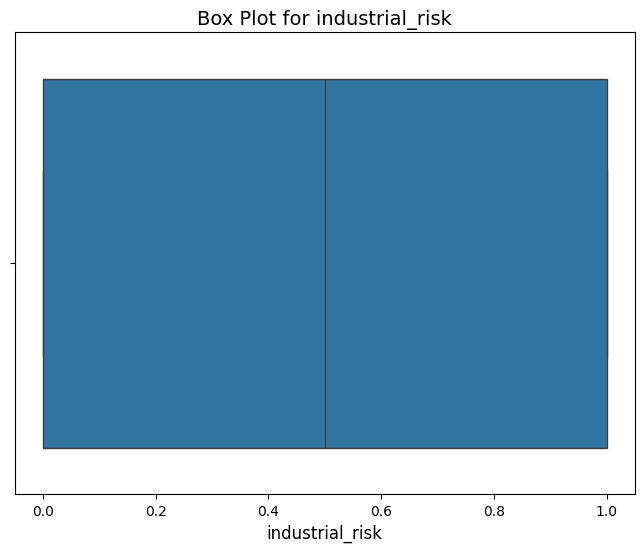

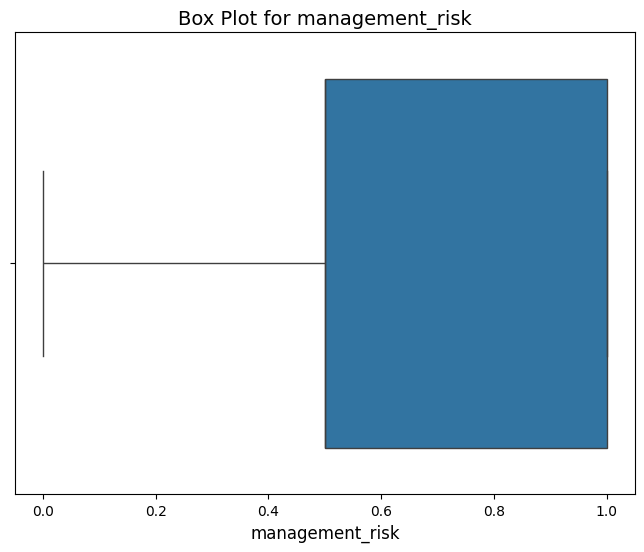

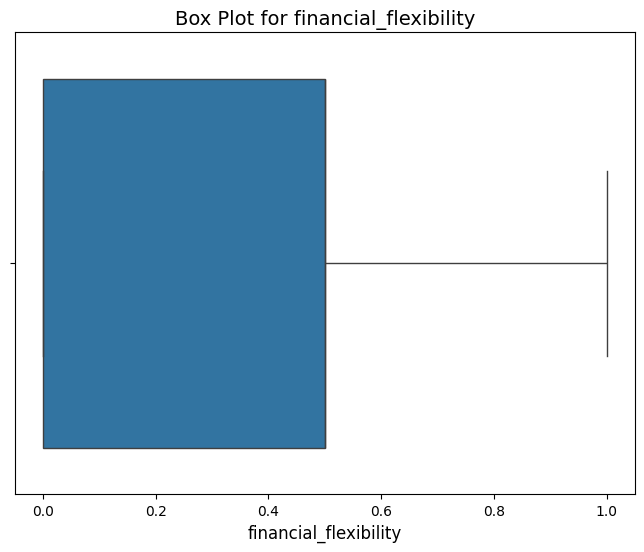

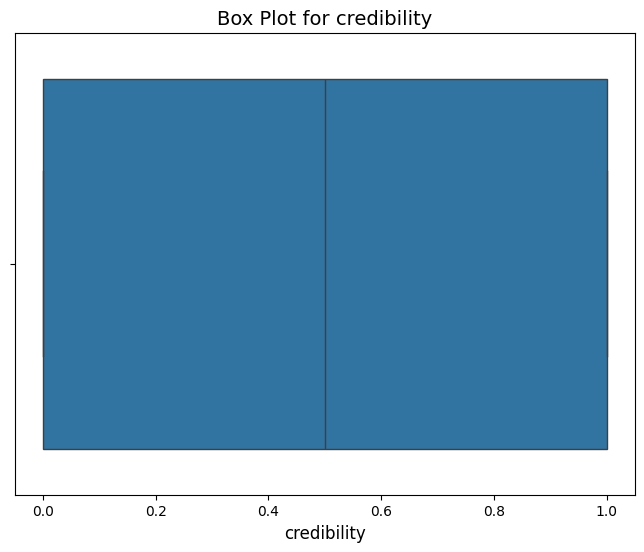

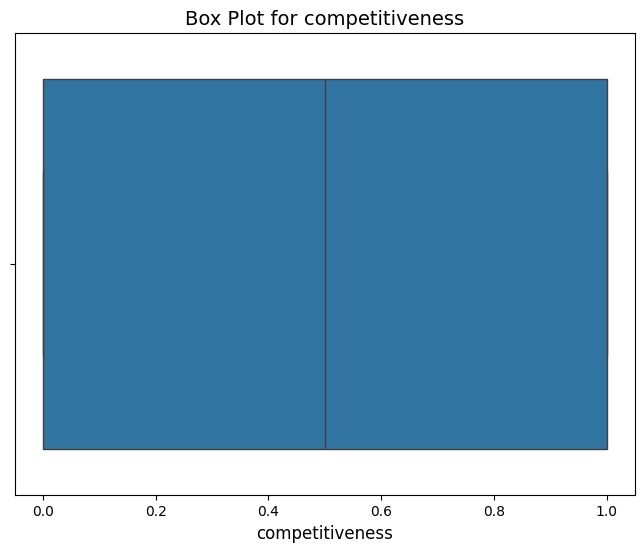

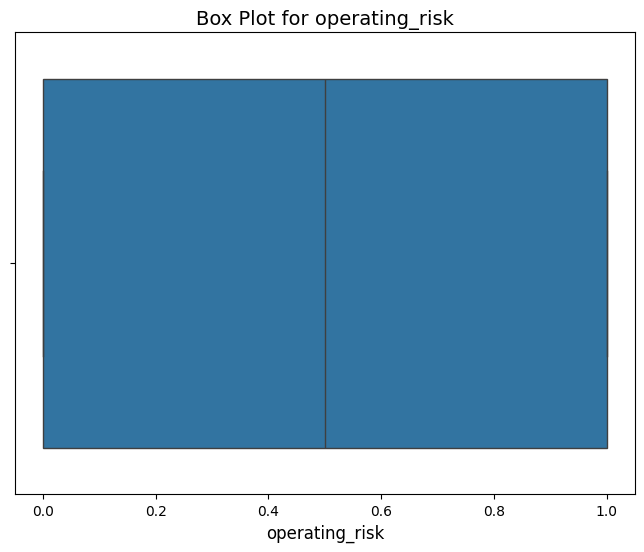

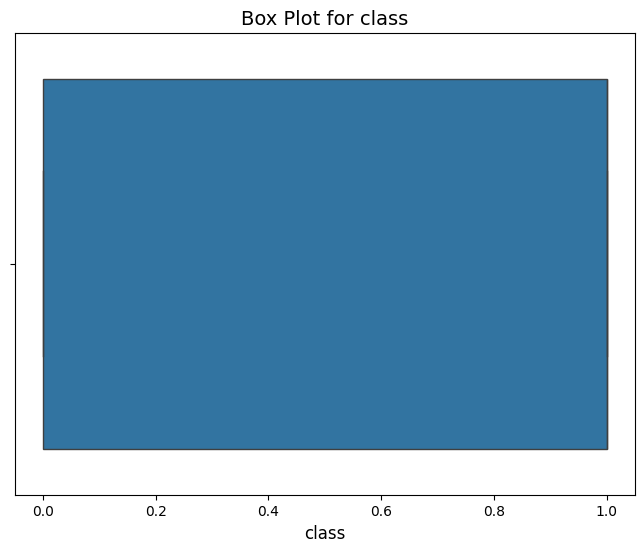

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=['float64']).columns  # Select only numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.show()



In [12]:
missing_values=(df.isnull().sum())
print(missing_values)

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


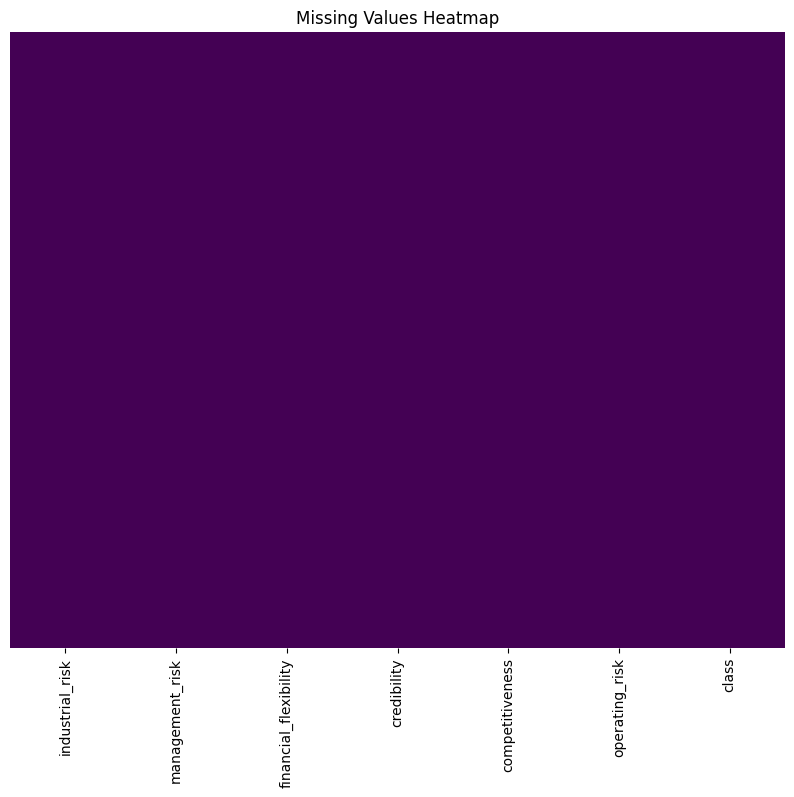

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Missing Values Heatmap')
plt.show()


In [14]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows : ",duplicate_rows)

Number of duplicate rows :  147


In [15]:
df = df.drop_duplicates()
duplicate_rows=df.duplicated().sum()
print("Number of duplicate rows :",duplicate_rows)

Number of duplicate rows : 0


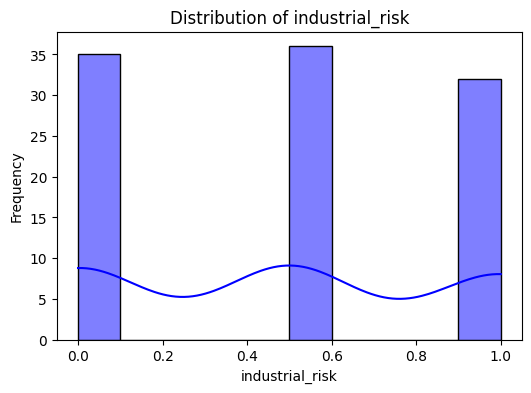

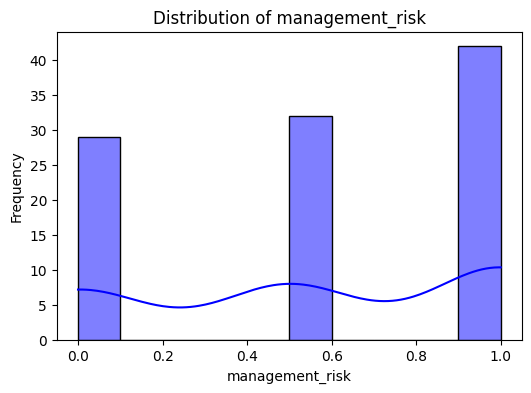

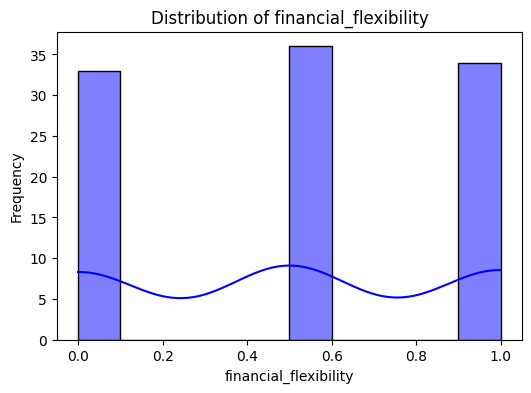

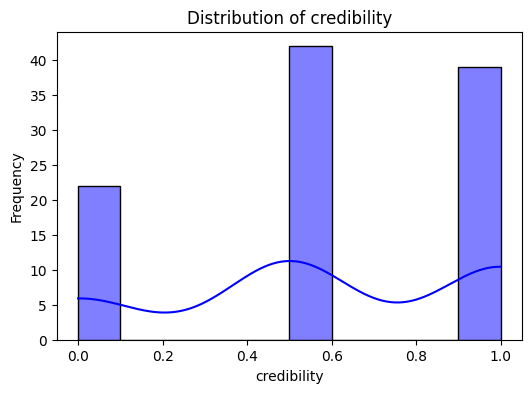

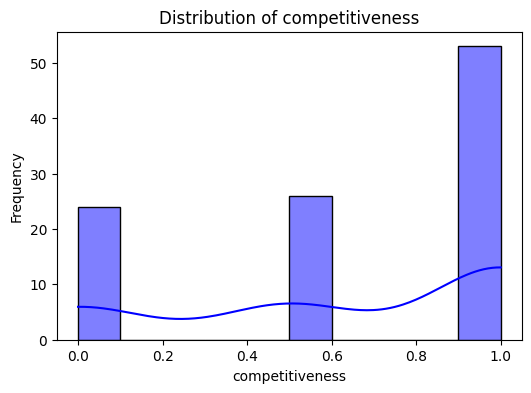

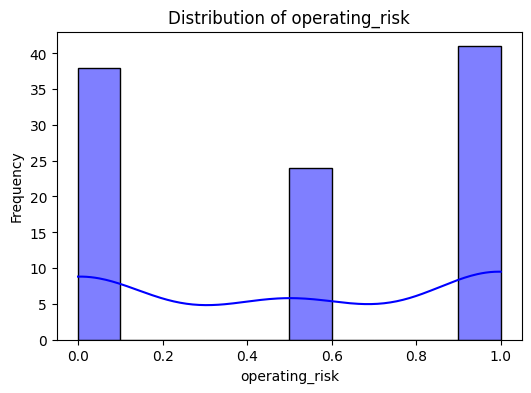

In [16]:
for column in df.columns[:-1]:  # Exclude target variable
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=10, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
value_counts = df['class'].value_counts()
print(value_counts)


class
1.0    78
0.0    25
Name: count, dtype: int64


<ipython-input-18-01973fdbdc0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='pastel')


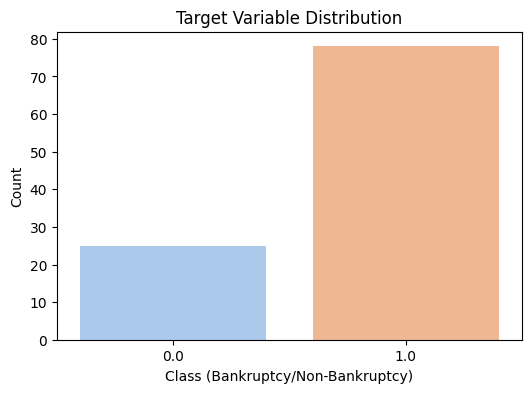

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='pastel')
plt.title("Target Variable Distribution")
plt.xlabel("Class (Bankruptcy/Non-Bankruptcy)")
plt.ylabel("Count")
plt.show()

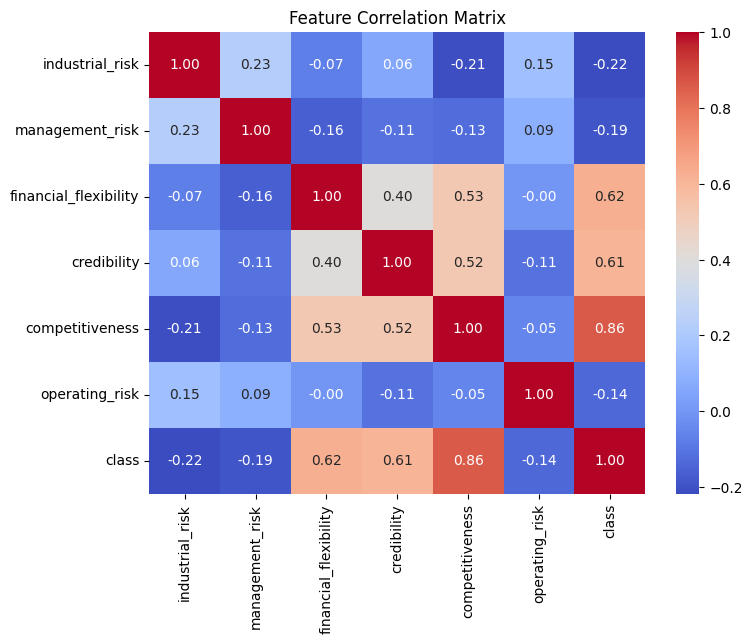

In [19]:
numerical_data = df.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Model Building

In [20]:
# Splitting features and target variable
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

In [21]:
# Encode target variable (if not numeric)
y = y.map({'non-bankruptcy': 0, 'bankruptcy': 1})  # Convert target to binary

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Dictionary to store models and their results
results = {}

In [30]:
# Encode target variable (if not numeric)
# y = y.map({'non-bankruptcy': 0, 'bankruptcy': 1})  # Convert target to binary # This line seems redundant

# Before splitting, drop rows with NaN in the target variable
df = df.dropna(subset=['class'])  # Drop rows where 'class' is NaN

# Now split your data
X = df.drop('class', axis=1)
y = df['class']

# Continue with the rest of your code (train_test_split, etc.)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Import necessary metrics

# Split the data into training and testing sets
# Re-split the data after dropping NaNs to avoid NaN values in target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
# Re-fit the scaler after dropping NaNs to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
# ... (rest of your code)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]),
    # 'Predictions': y_pred_lr,
    # 'Probabilities': lr.predict_proba(X_test_scaled)[:, 1]
}

In [31]:
from sklearn.svm import SVC
# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1]),
    # 'Predictions': y_pred_svm,
    # 'Probabilities': svm.predict_proba(X_test_scaled)[:, 1]
}

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    # 'Predictions': y_pred_rf,
    # 'Probabilities': rf.predict_proba(X_test_scaled)[:, 1]
}

In [33]:
from xgboost import XGBClassifier
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=35)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]),
    # 'Predictions': y_pred_xgb,
    # 'Probabilities': xgb.predict_proba(X_test_scaled)[:, 1]
}

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:15:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Display Results for models

In [34]:
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
      if metric not in ['Predictions', 'Probabilities']:
        print(f"{metric}: {value:.2f}")



Logistic Regression Performance:
Accuracy: 0.95
Precision: 0.94
Recall: 1.00
F1-Score: 0.97
ROC-AUC: 1.00

SVM Performance:
Accuracy: 0.95
Precision: 0.94
Recall: 1.00
F1-Score: 0.97
ROC-AUC: 1.00

Random Forest Performance:
Accuracy: 0.95
Precision: 0.94
Recall: 1.00
F1-Score: 0.97
ROC-AUC: 1.00

XGBoost Performance:
Accuracy: 0.95
Precision: 0.94
Recall: 1.00
F1-Score: 0.97
ROC-AUC: 0.90


In [36]:
#Classification Report
from sklearn.metrics import classification_report # Import the classification_report function
print("Classification Report:")
print(classification_report(y_test, y_pred_lr)) # Assuming y_pred_lr is the predictions from your logistic regression model.
                                               # Replace y_pred_lr if you need the report for a different model's prediction

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



# Model Evaluation

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame for easier visualization
results_df = pd.DataFrame(results).T

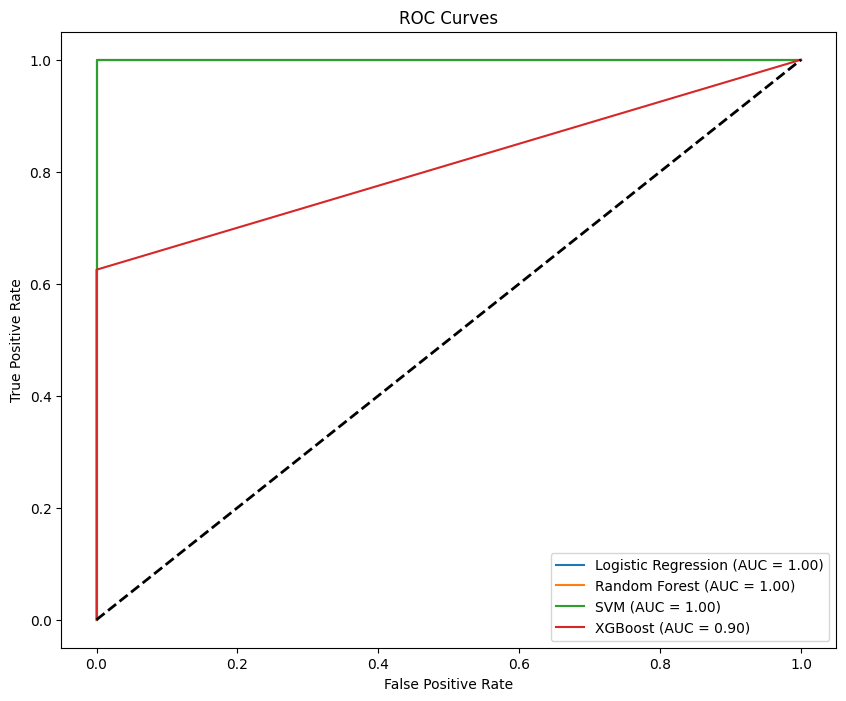

In [38]:
# Plotting ROC Curves
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb
}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'Random Forest', 'XGBoost']:
        y_proba = model.predict_proba(X_test_scaled if model_name != 'Random Forest' else X_test)[:, 1]
    else:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

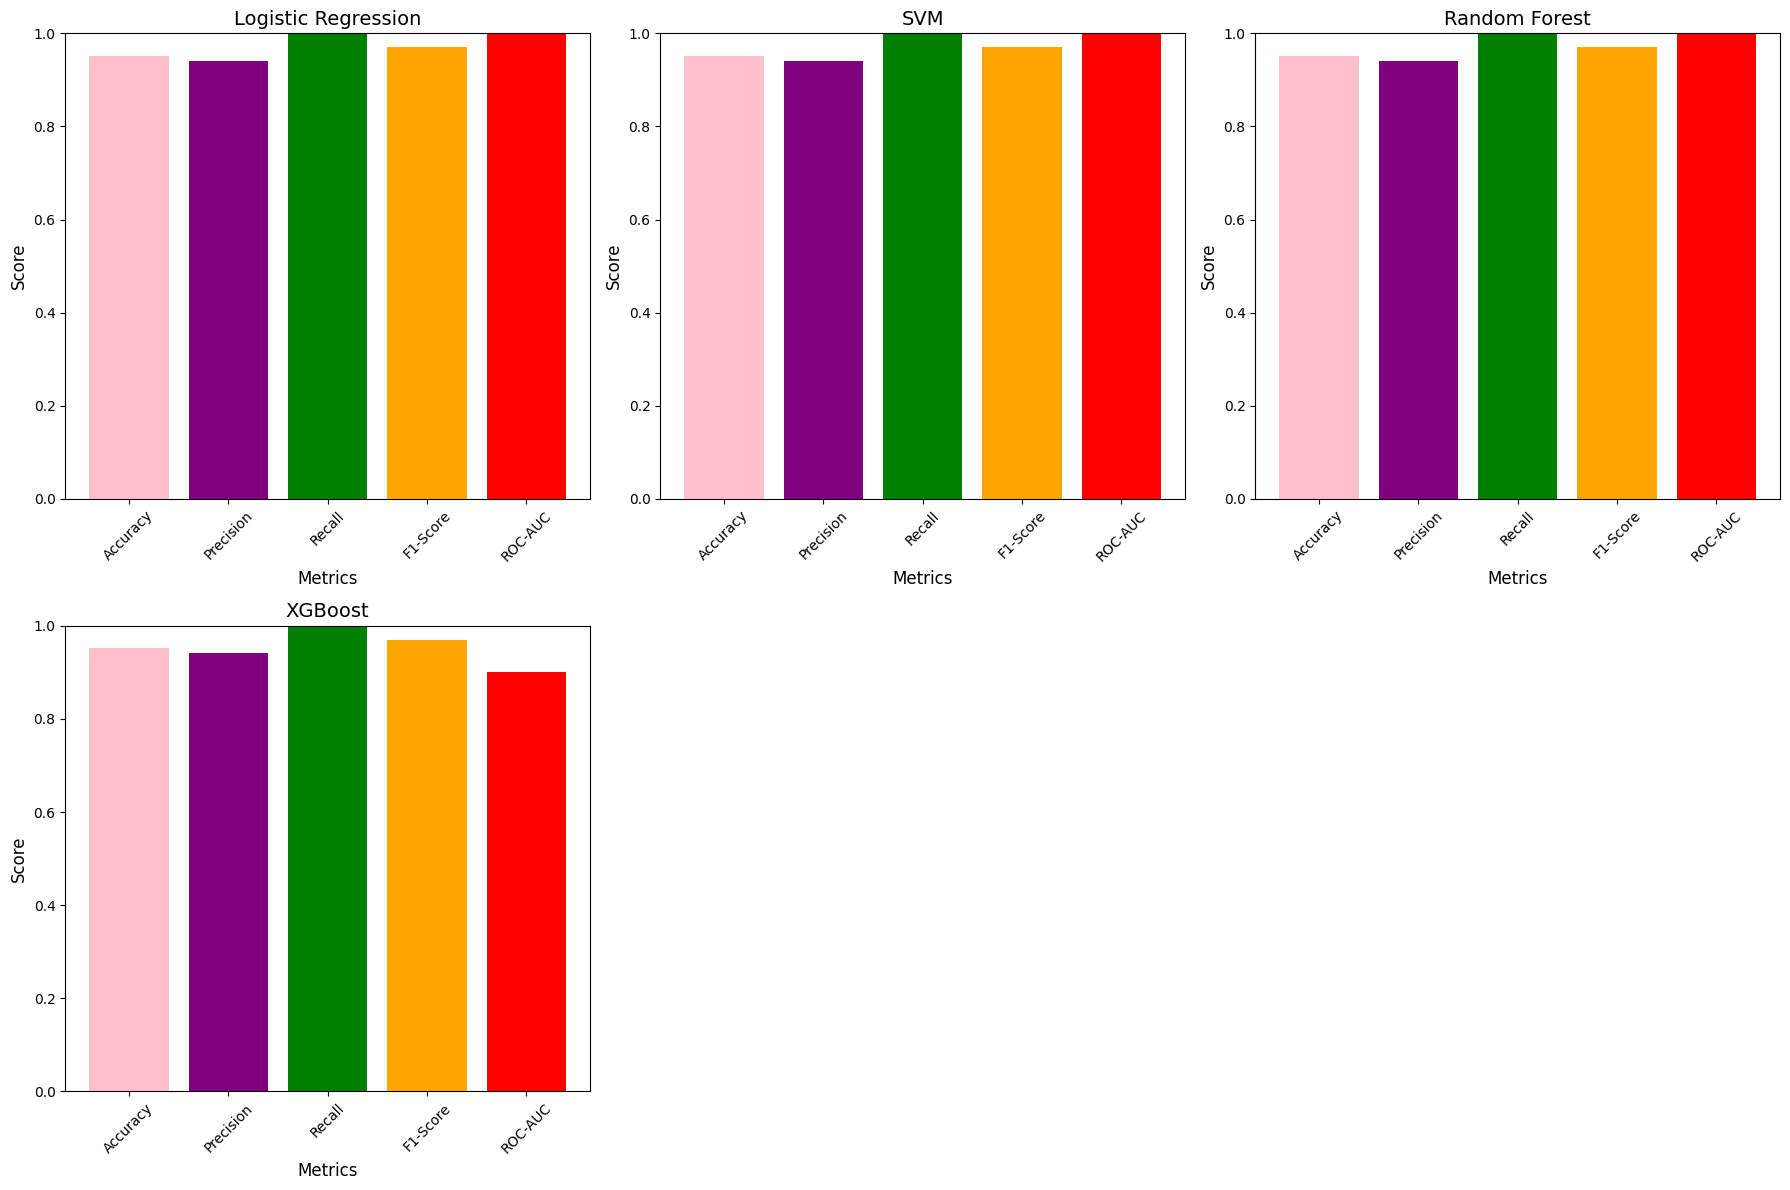

In [39]:
# Number of models
num_models = len(results)

# Colors for each bar
colors = ['pink', 'purple', 'green', 'orange', 'red']

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Loop through models and plot metrics
for i, (model, metrics) in enumerate(results.items()):
    # Filter out 'Predictions' and 'Probabilities' for plotting
    plot_metrics = {k: v for k, v in metrics.items() if k not in ['Predictions', 'Probabilities']}

    # Extract metrics for the current model
    metric_values = list(plot_metrics.values())  # Get the values (numbers) from the metrics dictionary
    metric_names = list(plot_metrics.keys())     # Get the keys (metric names) from the metrics dictionary

    # Create bar plot
    axes[i].bar(metric_names, metric_values, color=colors[:len(plot_metrics)])  # Use metric names for x-axis

    # Set title and labels
    axes[i].set_title(model, fontsize=14)
    axes[i].set_ylim(0, 1)  # Assume metrics are between 0 and 1
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].set_xlabel('Metrics', fontsize=12)

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=45)

# Turn off unused subplots (if any)
for j in range(len(results), len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplots

# Adjust layout and display plots
plt.tight_layout()
plt.show()

<ipython-input-40-768824271d1d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
<ipython-input-40-768824271d1d>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df.index, rotation=45)
<ipython-input-40-768824271d1d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
<ipython-input-40-768824271d1d>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

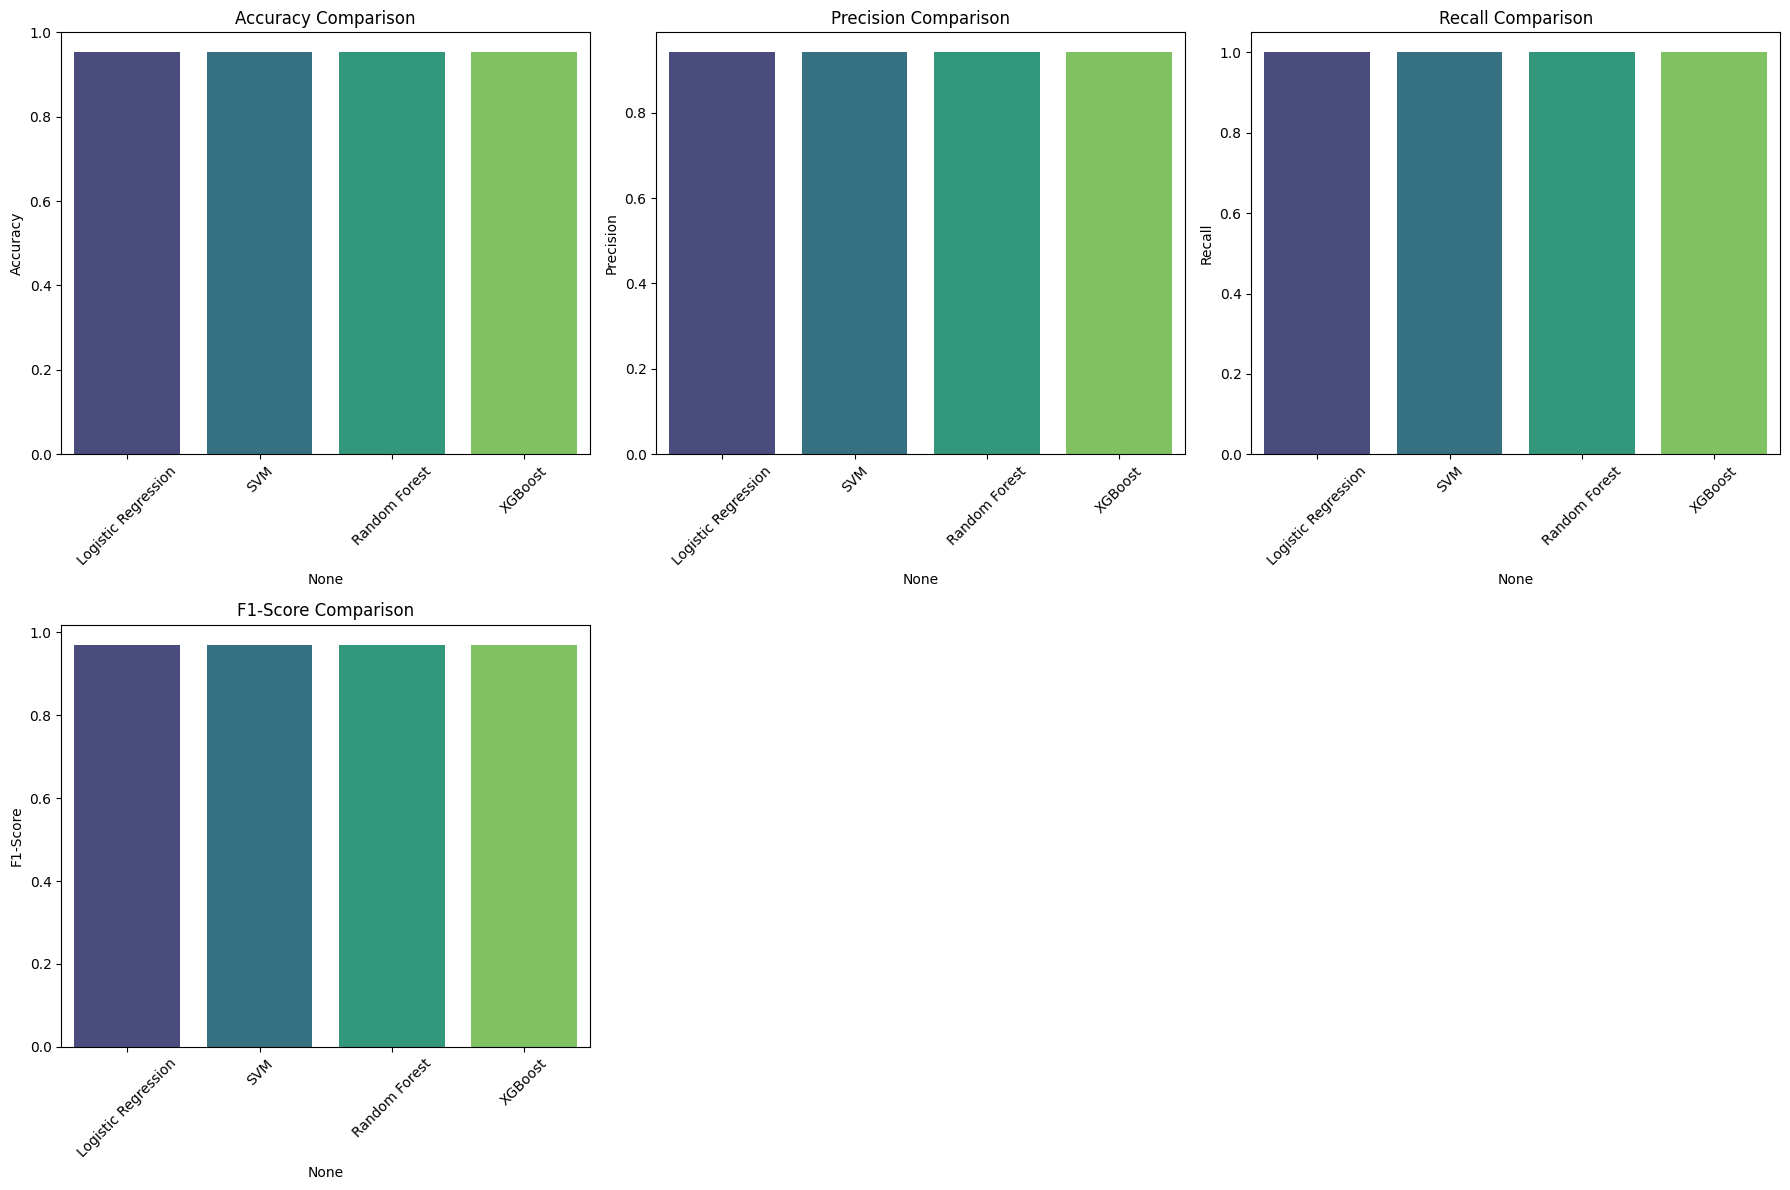

In [40]:
# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten for easy iteration

# Ensure axes is iterable
if len(metrics) == 1:
    axes = [axes]

# Plot each metric
for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(results_df.index, rotation=45)

# Turn off unused subplots (if any)
for j in range(len(results), len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplots

# Adjust layout and display
plt.tight_layout()
plt.show()

In [41]:

# Identify the best-performing model based on F1-Score
best_model = results_df['F1-Score'].idxmax()
print(f"The best-performing model is: {best_model} with F1-Score: {results_df.loc[best_model, 'F1-Score']:.2f}")


The best-performing model is: Logistic Regression with F1-Score: 0.97


# Model deployment

In [49]:
import pickle

# Save the Logistic Regression model to a pickle file
pickle_out = open("model_poly.pkl", "wb")
pickle.dump(lr, pickle_out)  # lr is your Logistic Regression model object
pickle_out.close()